# Doctor's Consultation Fees Prediction

**Problem Statement :-**

Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

## Importing the Neccesary libraries

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [215]:
df=pd.read_excel('/content/Final_Train.xlsx')
df


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [216]:
df.shape

(5961, 7)

There are 5961 rows and 7 columns.

In [217]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


The first 5 rows of Dataset.

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


## Satistical information

In [219]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000



Observations :-

1) Mean is greater than median for fees column.

2) There is difference between standard deviation and 75 % for fees column.

## Exploring Target Variable

In [220]:
df['Fees'].value_counts()

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64

 As we have continuos values in sales column, so, this is a regression problem.

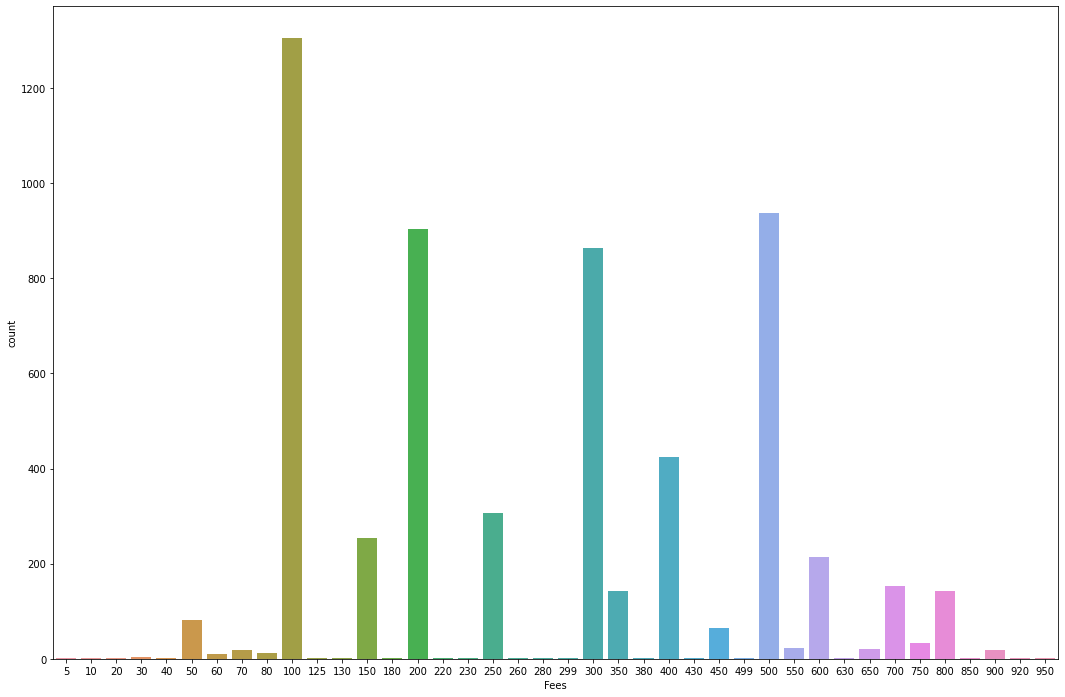

In [221]:
plt.figure(figsize=(18,12))
sns.countplot(df['Fees'])


**Observations :-**

1) More than 1200 doctors are taking 100 as their fees.

2) Few doctors are taking less than 60 as their fees.

3) 5 is the least fees taken by a doctor.

4) Mostly doctors are taking more than and equal to 350 as their fees.


## Data Visualizations

To check missing values

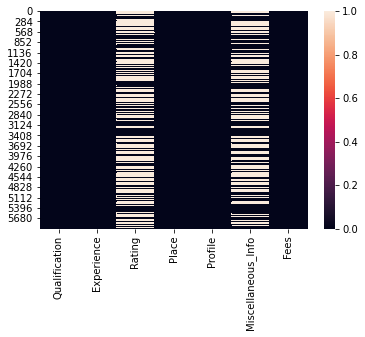

In [222]:
sns.heatmap(df.isnull())


Observations :-

Ratings and Miscellaneous_Info columns have null values.

In [223]:
df['Rating'].mode()[0]

'100%'

In [224]:
df['Rating']=df['Rating'].fillna(df['Rating'].mode()[0])

In [225]:
df['Rating'].isnull().sum()

0

In [226]:
df['Miscellaneous_Info'].isnull().sum()

2620

In [227]:
((5961-2620)/5961)*100

56.04764301291729

 1) 56% null vales are present in 'Miscellaneous_Info' column.

 2) 'Miscellaneous_Info' column is not so relevant for prediction of fees.

We will drop 'Miscellaneous_Info' column from dataset

In [228]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)


In [229]:
df['Place'].mode()[0]

'HSR Layout, Bangalore'

In [230]:
df['Place']=df['Place'].fillna(df['Place'].mode()[0])


## Feature Engineering

In [231]:
# Experience
df['Experience'] = df['Experience'].str.split().str[0]
df['Experience']

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: object

In [232]:
df['Experience'] = df['Experience'].astype(int)

In [233]:
df.head(2)

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350


In [234]:
df['locality'] = df['Place'].str.split(",").str[0]
df['city'] = df['Place'].str.split(",").str[1]

#Now we can drop the place variable
df.drop('Place',axis=1,inplace=True)

In [235]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100%,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,100%,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,250,Keelkattalai,Chennai


In [236]:
df['Rating'].value_counts()

100%    3986
98%      290
99%      259
97%      241
96%      220
95%      178
94%      115
93%      109
92%       66
90%       66
91%       60
89%       42
88%       41
85%       27
82%       23
86%       21
83%       21
80%       19
77%       16
87%       14
79%       13
84%       13
67%       12
81%       12
71%        9
76%        9
75%        8
73%        8
60%        7
74%        7
78%        6
56%        5
68%        5
69%        4
70%        4
57%        3
72%        3
33%        2
55%        2
62%        2
63%        2
64%        2
7%         1
47%        1
45%        1
65%        1
40%        1
53%        1
36%        1
58%        1
48%        1
Name: Rating, dtype: int64

In [237]:
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)


extract value of rating to avoid '%' and convert to numeric

In [238]:
df['Rating'].value_counts()

100    3986
98      290
99      259
97      241
96      220
95      178
94      115
93      109
92       66
90       66
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       16
87       14
84       13
79       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
56        5
68        5
69        4
70        4
57        3
72        3
33        2
64        2
62        2
63        2
55        2
48        1
40        1
7         1
65        1
45        1
53        1
47        1
58        1
36        1
Name: Rating, dtype: int64

In [239]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,100,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250,Keelkattalai,Chennai


In [240]:
print("0-9% ",len((df[(df['Rating']>0) & (df['Rating']<10)])))
print("10-19% ",len(df[(df['Rating']>=10) & (df['Rating']<20)]))
print("20-29% ",len(df[(df['Rating']>=20) & (df['Rating']<30)]))
print("30-39% ",len(df[(df['Rating']>=30) & (df['Rating']<40)]))
print("40-49% ",len(df[(df['Rating']>=40) & (df['Rating']<50)]))
print("50-59% ",len(df[(df['Rating']>=50) & (df['Rating']<60)]))
print("60-69% ",len(df[(df['Rating']>=60) & (df['Rating']<70)]))
print("70-79% ",len(df[(df['Rating']>=70) & (df['Rating']<80)]))
print("80-89% ",len(df[(df['Rating']>=80) & (df['Rating']<90)]))
print("90-99% ",len(df[(df['Rating']>=90) & (df['Rating']<100)]))
print("100-109% ",len(df[(df['Rating']>=100) & (df['Rating']<110)]))

0-9%  1
10-19%  0
20-29%  0
30-39%  3
40-49%  4
50-59%  12
60-69%  35
70-79%  83
80-89%  233
90-99%  1604
100-109%  3986


In [241]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(10)]
df['Rating'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

In [242]:
len(bins)

11

In [243]:
len(labels)

10

In [244]:
df['Rating'].value_counts().sort_index()

0       1
1       0
2       0
3       4
4       3
5      19
6      32
7      98
8     280
9    5524
Name: Rating, dtype: int64

 now it is exactly being grouped.

In [245]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,9,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,9,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,9,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,9,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,9,Ayurveda,250,Keelkattalai,Chennai


In [246]:
df['Qualification_count'] = df['Qualification'].apply(lambda x: len(x.split(",")))
df['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [247]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city,Qualification_count
0,"BHMS, MD - Homeopathy",24,9,Homeopath,100,Kakkanad,Ernakulam,2
1,"BAMS, MD - Ayurveda Medicine",12,9,Ayurveda,350,Whitefield,Bangalore,2
2,"MBBS, MS - Otorhinolaryngology",9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,"BSc - Zoology, BAMS",12,9,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,BAMS,20,9,Ayurveda,250,Keelkattalai,Chennai,1


In [248]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [249]:
# Extract relevant qualification
# DICT of qualification with there counts
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            
#print(Qualification)

In [250]:
df["Qualification"]

0                [BHMS,  MD - Homeopathy]
1         [BAMS,  MD - Ayurveda Medicine]
2       [MBBS,  MS - Otorhinolaryngology]
3                  [BSc - Zoology,  BAMS]
4                                  [BAMS]
                      ...                
5956                    [MBBS,  MS - ENT]
5957                               [MBBS]
5958                               [MBBS]
5959       [MBBS,  MD - General Medicine]
5960           [BDS,  MDS - Orthodontics]
Name: Qualification, Length: 5961, dtype: object

In [251]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city,Qualification_count
0,"[BHMS, MD - Homeopathy]",24,9,Homeopath,100,Kakkanad,Ernakulam,2
1,"[BAMS, MD - Ayurveda Medicine]",12,9,Ayurveda,350,Whitefield,Bangalore,2
2,"[MBBS, MS - Otorhinolaryngology]",9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,"[BSc - Zoology, BAMS]",12,9,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,[BAMS],20,9,Ayurveda,250,Keelkattalai,Chennai,1


In [252]:
#Extract top 10 qual
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [253]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city,Qualification_count
0,"[BHMS, MD - Homeopathy]",24,9,Homeopath,100,Kakkanad,Ernakulam,2
1,"[BAMS, MD - Ayurveda Medicine]",12,9,Ayurveda,350,Whitefield,Bangalore,2
2,"[MBBS, MS - Otorhinolaryngology]",9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,"[BSc - Zoology, BAMS]",12,9,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,[BAMS],20,9,Ayurveda,250,Keelkattalai,Chennai,1


In [254]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    df[qual] = 0

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df[c][y] = 1

In [255]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city,Qualification_count,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,9,Homeopath,100,Kakkanad,Ernakulam,2,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,9,Ayurveda,350,Whitefield,Bangalore,2,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,2,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,9,Ayurveda,250,Bannerghatta Road,Bangalore,2,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,9,Ayurveda,250,Keelkattalai,Chennai,1,0,0,1,0,0,0,0,0,0,0


In [256]:
# Now we can drop the extra quali which we added 
df.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [257]:
df.head()

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,9,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,9,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,9,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,9,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [258]:
# CITY COLUMN
df['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', ' Sector 5', nan],
      dtype=object)

In [259]:
import re
df['city'] = df['city'].apply(lambda x: re.sub(' +','',str(x)))

remove the extra spaces before the city.

In [260]:
df['city'].value_counts()

Bangalore             1283
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
nan                      1
Sector5                  1
Name: city, dtype: int64

In [261]:
df[df['locality'] == 'Dwarka']

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
166,7,9,Dentist,300,Dwarka,Delhi,0,1,0,0,0,0,0,0,0,0
299,8,9,Homeopath,250,Dwarka,Delhi,0,0,0,1,0,0,0,0,0,0
306,31,9,General Medicine,300,Dwarka,Delhi,1,0,0,0,0,0,0,0,0,0
485,30,9,Ayurveda,200,Dwarka,Delhi,0,0,1,0,0,0,0,0,0,0
690,19,9,General Medicine,700,Dwarka,Delhi,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,30,6,ENT Specialist,400,Dwarka,Delhi,1,0,0,0,0,1,0,0,0,0
5685,19,9,Dermatologists,400,Dwarka,Delhi,1,0,0,0,0,0,0,0,0,0
5724,11,9,Dentist,300,Dwarka,Delhi,0,1,0,0,0,0,0,0,0,0
5886,11,9,Dermatologists,600,Dwarka,Delhi,1,0,0,0,1,0,1,0,0,0


whereever the locality is Dwarka the city is Delhi, and this Sector5 is area of that so it's misclassified here. which we have to correct.

In [262]:
df['city'] = np.where(df['city']=="Sector5","Delhi", df['city'])

In [263]:
df['city']=df['city'].fillna(df['city'].mode()[0])

Removing nan values from city column.

In [264]:
df.head()

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,9,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,9,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,9,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,9,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [265]:
df.isnull().sum()

Experience                              0
Rating                                  0
Profile                                 0
Fees                                    0
locality                                0
city                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
dtype: int64

In [266]:
df.groupby('city')['locality'].nunique()

city
Bangalore             153
Chennai               124
Coimbatore             48
Delhi                 200
Ernakulam              52
Hyderabad             135
Mumbai                115
Thiruvananthapuram     48
nan                     1
Name: locality, dtype: int64

let's see for each city how much locality data is there.

In [267]:
df.head()

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,9,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,9,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,9,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,9,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [268]:
df.drop(['locality'],axis=1,inplace=True)

In [269]:
df.head()

,Experience,Rating,Profile,Fees,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,9,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,9,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,9,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,9,Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,9,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


## Bivariate Analysis

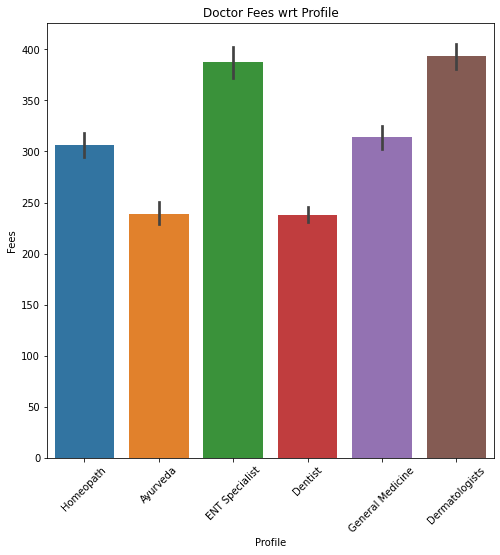

In [270]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=df)
plt.title("Doctor Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()


**Observations :-**

1) Highest Fees is taken by Dermatologists and ENT Specialist.

2) Lowest Fees is taken by Ayurveda and Dentist.

3) Doctors of Homeopath and General Medicine Profiles take almost equal fees around 300.

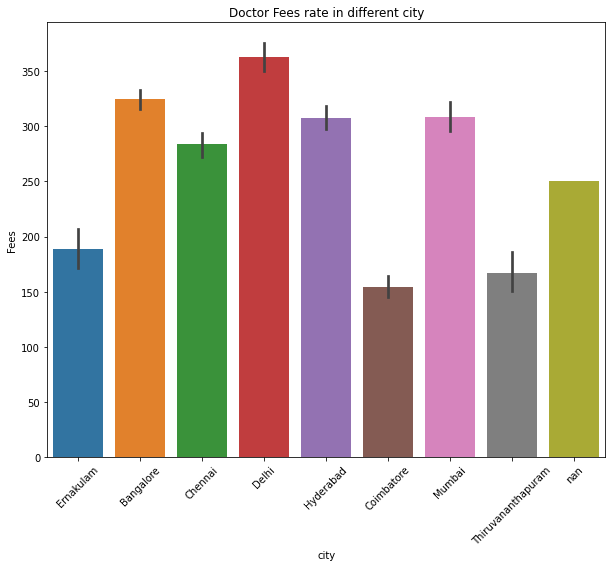

In [271]:
plt.figure(figsize=(10,8))
sns.barplot(x='city',y='Fees',data=df)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

**Observations :-**

1) Highest fees is taken by doctors in Delhi.

2) Lowest fees is taken by doctors in Coimbatore.

3) Doctors of Hyderabad and Mumbai charges equal fees.

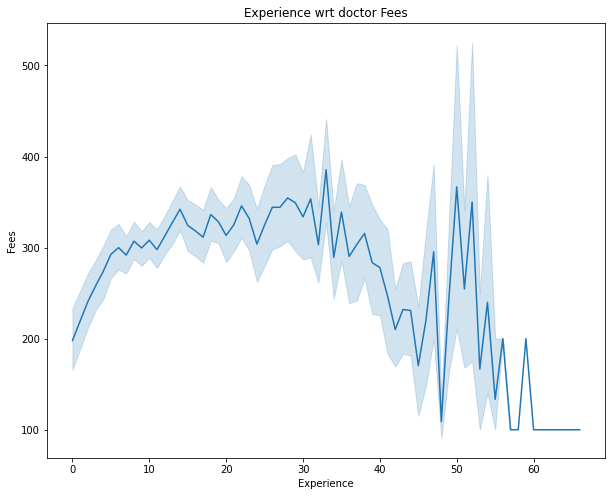

In [272]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=df)
ax.set_title("Experience wrt doctor Fees")
plt.show()

**Observations :-**

1) Fees of the doctors approximately increase in the range of 0-15 years of experience.

2) Fees of the doctors approximately remains constant in the range of 15 - 35 years of experience.

3) Fees of the doctors approximately decrease in the range of 35-45 years.

4) The doctors' fees become unconstant ( sometimes it increases and sometimes it decreases ) after 45 years of experience.

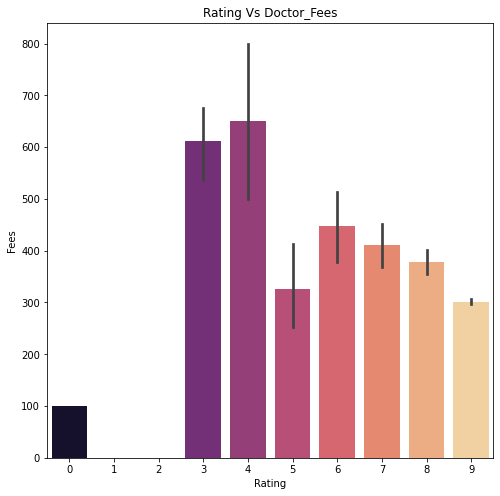

In [273]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Fees',data=df,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()


Observations :-

As, we can see that High rating does not relate to high fees charged(infact low fees can be reason of high rating) and where fees are charged so high, there rating is between 30-60%.

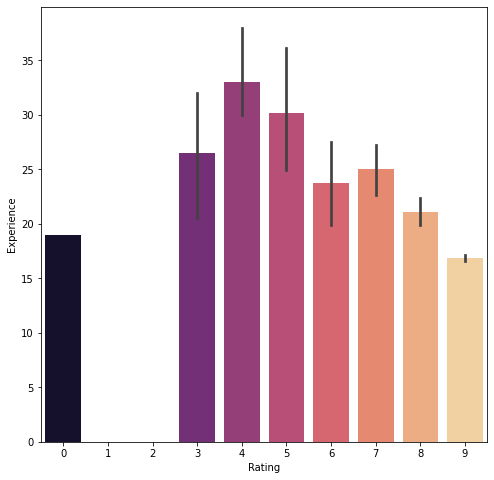

In [274]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Experience',data=df,palette='magma')
plt.show()


Observations :-

The median of experience in bin 4 & 5 is 27 and 31 years respectively. whereas in highest rating of 10th bin the median experience is 14 years.

## To check correlation

In [275]:
dfcor=df.corr()
dfcor

,Experience,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
Experience,1.000000,0.002117,0.271347,-0.196268,-0.047150,-0.114191,-0.067704,0.093778,-0.120213,0.097549,0.111103,0.008510
Fees,0.002117,1.000000,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,0.040921,0.011560,0.018601
MBBS,0.271347,0.271038,1.000000,-0.512244,-0.358911,-0.355083,0.314207,0.263449,0.213185,0.220358,0.206347,-0.164871
BDS,-0.196268,-0.198635,-0.512244,1.000000,-0.208341,-0.206141,-0.182900,-0.148092,-0.123730,-0.121943,-0.113622,-0.096301
BAMS,-0.047150,-0.139891,-0.358911,-0.208341,1.000000,-0.145019,-0.128669,-0.104182,-0.087044,-0.078722,-0.079932,-0.067747
BHMS,-0.114191,-0.002423,-0.355083,-0.206141,-0.145019,1.000000,-0.127311,-0.103082,-0.086124,-0.077760,-0.079088,0.349109
MD - Dermatology,-0.067704,0.163811,0.314207,-0.182900,-0.128669,-0.127311,1.000000,-0.091460,0.637946,-0.075311,-0.064618,-0.059475
MS - ENT,0.093778,0.128413,0.263449,-0.148092,-0.104182,-0.103082,-0.091460,1.000000,-0.061872,-0.060978,0.168226,-0.048156
Venereology & Leprosy,-0.120213,0.113091,0.213185,-0.123730,-0.087044,-0.086124,0.637946,-0.061872,1.000000,-0.050947,-0.039713,-0.040234
MD - General Medicine,0.097549,0.040921,0.220358,-0.121943,-0.078722,-0.077760,-0.075311,-0.060978,-0.050947,1.000000,-0.046785,-0.039653


## Multivariate Analysis

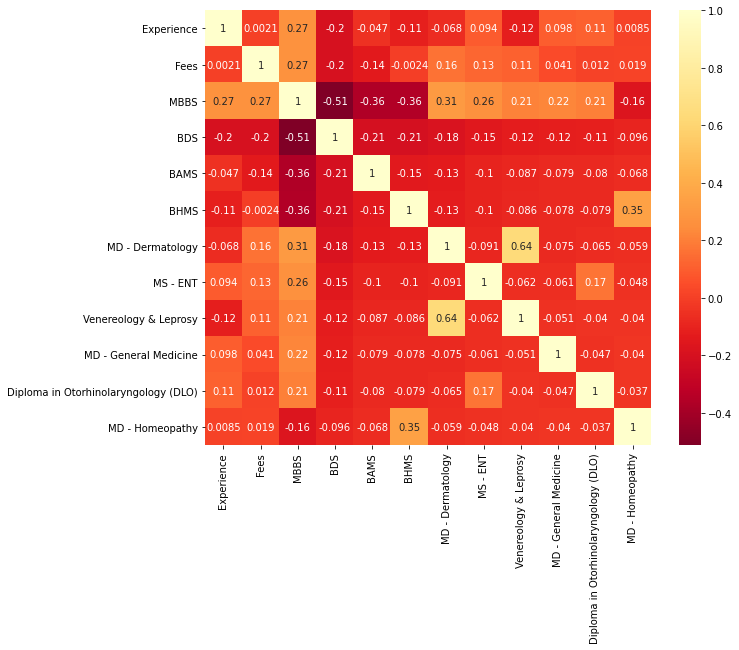

In [276]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)


**Observations :-**

1) Fees is highly positively correlated to MBBS.

2) MBBS is highly negatively correlated to BDS.

3) BDS is highly positively correlated to MD-homeopathy.

4) BDS is highly negatively correlated to fees.


## Encoding

In [277]:
df = pd.get_dummies(df,columns=['city','Profile'], prefix=['city','Profile'])

In [278]:
df.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city_Bangalore,city_Chennai,city_Coimbatore,city_Delhi,city_Ernakulam,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_nan,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,9,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12,9,350,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,9,300,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,9,250,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,20,9,250,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0



## Plotting Outliers

Experience                                 AxesSubplot(0.125,0.787927;0.168478x0.0920732)
Fees                                    AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
MBBS                                    AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
BDS                                     AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
BAMS                                       AxesSubplot(0.125,0.677439;0.168478x0.0920732)
BHMS                                    AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
MD - Dermatology                        AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
MS - ENT                                AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
Venereology & Leprosy                      AxesSubplot(0.125,0.566951;0.168478x0.0920732)
MD - General Medicine                   AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
Diploma in Otorhinolaryngology (DLO)    AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
MD - Homeo

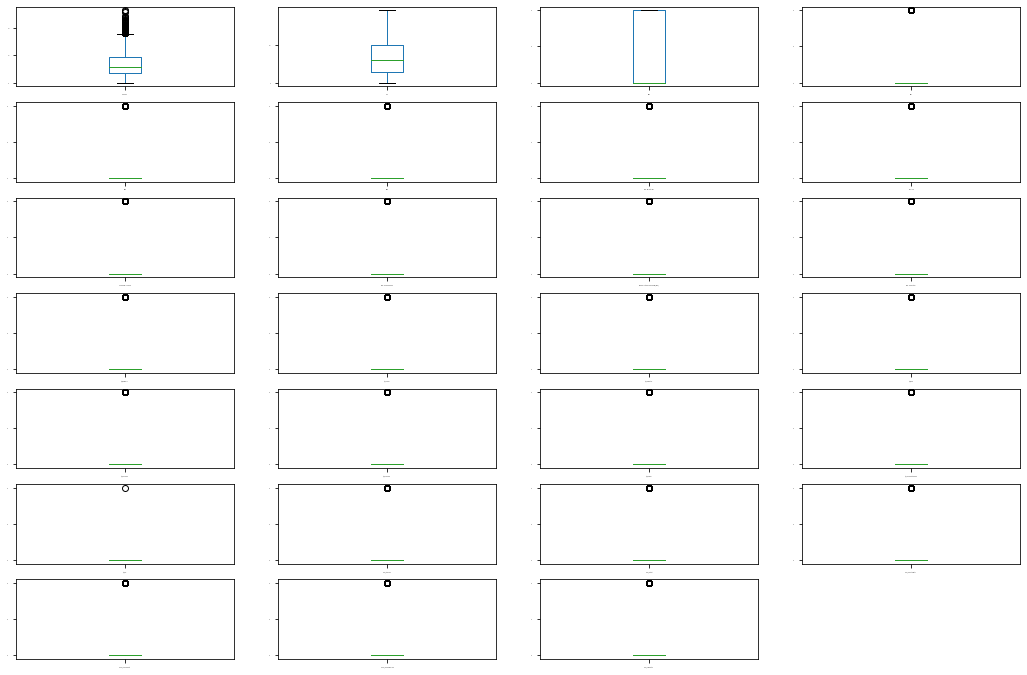

In [279]:
df.plot(kind='box',subplots=True,layout=(7,4),sharex=False,fontsize=1,figsize=(18,12))

Observations :-

All columns have outliers except Fees and MBBS columns.


## Removing Outliers

In [280]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.60097885, 0.23410883, 1.08926083, ..., 0.3729841 , 0.49496209,
        2.46397532],
       [0.47604029, 0.23410883, 0.22029544, ..., 0.3729841 , 0.49496209,
        0.40584822],
       [0.74529508, 0.23410883, 0.04161581, ..., 2.68107941, 0.49496209,
        0.40584822],
       ...,
       [2.12675597, 0.23410883, 1.52985171, ..., 0.3729841 , 2.02035676,
        0.40584822],
       [0.20678551, 1.77095257, 1.08926083, ..., 0.3729841 , 2.02035676,
        0.40584822],
       [0.02728232, 0.23410883, 0.56543832, ..., 0.3729841 , 0.49496209,
        0.40584822]])

In [281]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [282]:
df_new.shape

(4097, 28)

In [283]:
df.shape

(5961, 28)

In [284]:
((5961-4097)/5961)*100

31.269921154168763

31.26 % of data has removed using z-score method.

In [285]:
df.columns

Index(['Experience', 'Rating', 'Fees', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'city_Bangalore', 'city_Chennai', 'city_Coimbatore',
       'city_Delhi', 'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'city_nan', 'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

In [286]:
df=df_new

In [287]:
df.shape

(4097, 28)

# To Check Skewness

In [288]:
df.skew()

Experience                              0.956205
Fees                                    0.727408
MBBS                                    0.558197
BDS                                     1.039569
BAMS                                    1.689173
BHMS                                    2.042803
MD - Dermatology                        3.334022
MS - ENT                                0.000000
Venereology & Leprosy                   0.000000
MD - General Medicine                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
MD - Homeopathy                         0.000000
city_Bangalore                          1.259772
city_Chennai                            1.954556
city_Coimbatore                         0.000000
city_Delhi                              1.436061
city_Ernakulam                          0.000000
city_Hyderabad                          1.740490
city_Mumbai                             1.246934
city_Thiruvananthapuram                 0.000000
city_nan            

In [289]:
df_list=['Experience',    'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'city_Bangalore', 'city_Chennai', 
       'city_Delhi',  'city_Hyderabad', 'city_Mumbai',
       'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath']
for val in df_list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [290]:
df.skew()

Experience                              0.037297
Fees                                    0.727408
MBBS                                    0.558197
BDS                                     1.039569
BAMS                                    1.689173
BHMS                                    2.042803
MD - Dermatology                        3.334022
MS - ENT                                0.000000
Venereology & Leprosy                   0.000000
MD - General Medicine                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
MD - Homeopathy                         0.000000
city_Bangalore                          1.258789
city_Chennai                            1.954102
city_Coimbatore                         0.000000
city_Delhi                              1.435547
city_Ernakulam                          0.000000
city_Hyderabad                          1.740234
city_Mumbai                             1.246094
city_Thiruvananthapuram                 0.000000
city_nan            

In [291]:
df.columns

Index(['Experience', 'Rating', 'Fees', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'city_Bangalore', 'city_Chennai', 'city_Coimbatore',
       'city_Delhi', 'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'city_nan', 'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')


## Train Test Split

In [292]:
x=df[['Experience', 'Rating', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'city_Bangalore', 'city_Chennai', 'city_Coimbatore',
       'city_Delhi', 'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'city_nan', 'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath']]

y=df['Fees']


## Scaling of Data

In [293]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [294]:
x=pd.DataFrame(x)

In [295]:
x.columns=['Experience', 'Rating',  'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'city_Bangalore', 'city_Chennai', 'city_Coimbatore',
       'city_Delhi', 'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'city_nan', 'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath']


## Algorithms

In [296]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.1285243605498474
error:
Mean absolute error: 135.9726824994385
Mean squared error: 28748.97752528479
Root Mean squared error: 169.555234437881
0.11510024131034535
error:
Mean absolute error: 131.66548644783919
Mean squared error: 26718.00356322386
Root Mean squared error: 163.45642710895115
0.1186428977543883
error:
Mean absolute error: 138.11161103466625
Mean squared error: 29139.143973776012
Root Mean squared error: 170.70191555391526
0.08172176510050677
error:
Mean absolute error: 135.09204493865062
Mean squared error: 28657.045659264404
Root Mean squared error: 169.28392026198
0.1227283982824906
error:
Mean absolute error: 136.54414468355424
Mean squared error: 29450.63420088595
Root Mean squared error: 171.61187080410826
0.10839778335680428
error:
Mean absolute error: 134.39791588262605
Mean squared error: 27974.26655572451
Root Mean squared error: 167.25509425941115
0.09531331335216409
error:
Mean absolute error: 136.74977428437364
Mean squared error: 28587.90804273105
Root Mea

In [297]:
from sklearn.metrics import make_scorer

**To use RMSLE we will create our own scorer .**

In [298]:
# calculate RMSLE.
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make our own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [299]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=79)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print(lm, score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.7914457986125603
error:
Mean absolute error: 135.16860644728766
Mean squared error: 27402.299669180604
Root Mean squared error: 165.53639983151925


In [300]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print(lm, score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.737928546704964
error:
Mean absolute error: 146.50507973017892
Mean squared error: 37924.70360469905
Root Mean squared error: 194.74265995076436


In [301]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
print(lm, score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.7822264670419941
error:
Mean absolute error: 137.22838137472283
Mean squared error: 30424.019157427938
Root Mean squared error: 174.4248237993318


In [302]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
print(lm, score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.800720856159752
error:
Mean absolute error: 136.92186051510424
Mean squared error: 30172.09291444758
Root Mean squared error: 173.70115979591955


In [303]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [304]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
print(lm, score(y_test,predls))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predls))
print('Mean squared error:',mean_squared_error(y_test,predls))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predls)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.7910441663985767
error:
Mean absolute error: 135.40471961720826
Mean squared error: 27465.879659104554
Root Mean squared error: 165.72833088854952


In [305]:
el=ElasticNet(alpha=.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
predel=el.predict(x_test)
print(lm, score(y_test,predel))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.7910438166521276
error:
Mean absolute error: 135.16860644728766
Mean squared error: 27402.299669180604
Root Mean squared error: 165.53639983151925


## Ensembler Techniques

In [306]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(lm, score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.7764934859225094
error:
Mean absolute error: 139.7384562719918
Mean squared error: 32104.20712741567
Root Mean squared error: 179.17646923470633


In [307]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(lm, score(y_test,predad))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predad))
print('Mean squared error:',mean_squared_error(y_test,predad))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predad)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.775973896832138
error:
Mean absolute error: 138.40694270616643
Mean squared error: 27914.245825837777
Root Mean squared error: 167.07556920698423


**Support Vector Regressor is the best algorithm.**


## Cross - Validation Scores

In [308]:
from sklearn.model_selection import cross_val_score
svmscores=cross_val_score(svm,x,y,cv=5)
print(svmscores)
print(svmscores.mean(),svmscores.std())

[0.05323824 0.03473653 0.07383077 0.02192753 0.0642827 ]
0.049603153347756626 0.018987558261094925


In [309]:
list1=[0.800720856159752]
list2=[0.04960315334775665]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.7511177028119953]



As the difference between accuracy score and cross validation score of Support Vector Regressor is only 7 %. So, It is verified that Support Vector Regressor is the best algorithm for this model with accuracy of 80.072 % .


## Saving the model

In [310]:
import joblib
joblib.dump(svm,"svm_doctor_fees.obj")

['svm_doctor_fees.obj']

## Making Predictions

In [311]:
a=joblib.load("svm_doctor_fees.obj")

In [312]:
pred

array([350.47009425, 263.84509425, 360.90759425, 297.65759425,
       321.47009425, 429.84509425, 293.90759425, 291.40759425,
       260.34509425, 332.97009425, 291.90759425, 314.47009425,
       335.65759425, 240.72009425, 259.97009425, 290.72009425,
       397.84509425, 390.97009425, 259.59509425, 374.22009425,
       472.22009425, 332.97009425, 394.22009425, 271.09509425,
       284.22009425, 318.97009425, 391.84509425, 239.47009425,
       254.97009425, 258.59509425, 256.97009425, 302.22009425,
       289.90759425, 332.90759425, 239.97009425, 265.90759425,
       277.59509425, 296.22009425, 224.97009425, 235.84509425,
       274.72009425, 300.59509425, 253.59509425, 260.47009425,
       301.47009425, 322.22009425, 276.22009425, 301.72009425,
       422.84509425, 245.84509425, 256.09509425, 300.47009425,
       291.40759425, 256.97009425, 237.72009425, 471.72009425,
       464.72009425, 332.97009425, 242.47009425, 252.22009425,
       242.47009425, 290.72009425, 377.22009425, 248.34

In [313]:
df_2=pd.DataFrame(pred)
df_2.to_csv('doctor_fees_submission_final.csv')